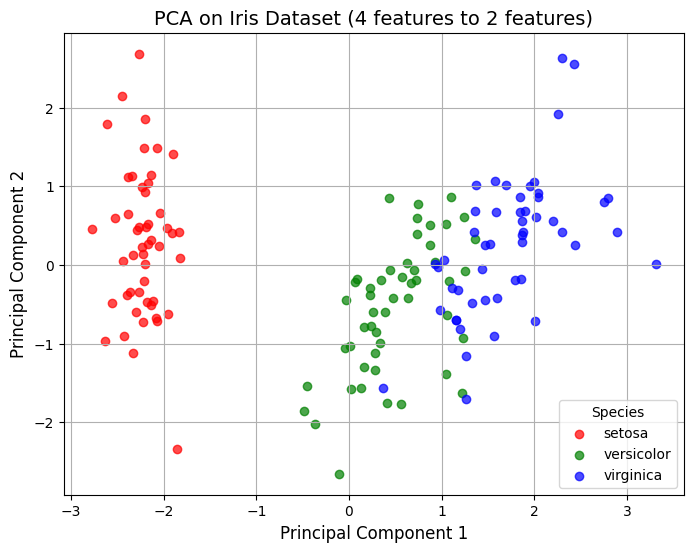

Explained Variance by each Principal Component:
Principal Component 1:  0.7296244541329985
Principal Component 2:  0.22850761786701787
Total Variance Retained:  0.9581320720000164


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = load_iris()
features = iris.data
target = iris.target

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

pca_df = pd.DataFrame(data=features_pca, columns=["Principal Component 1", "Principal Component 2"])
pca_df["Target"] = target

plt.figure(figsize=(8, 6))
for label, color in zip(iris.target_names, ["red", "green", "blue"]):
    plt.scatter(
        pca_df.loc[pca_df["Target"] == list(iris.target_names).index(label), "Principal Component 1"],
        pca_df.loc[pca_df["Target"] == list(iris.target_names).index(label), "Principal Component 2"],
        label=label,
        color=color,
        alpha=0.7
    )

plt.title("PCA on Iris Dataset (4 features to 2 features)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Species")
plt.grid()
plt.show()

explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each Principal Component:")
print("Principal Component 1: ",explained_variance[0])
print("Principal Component 2: ",explained_variance[1])
print("Total Variance Retained: ",sum(explained_variance))